### Loan Data Analysis - BIDA406 Assignment 2 - Roma Rico Flores

#### Statement of the Problem

Lending money to customers is inherently risky, as there is always a chance that the borrower may default on the loan. Money lending institutions need to manage credit risk effectively to minimize the likelihood of loan defaults and mitigate the potential losses.

The goal of this model is to predict whether a loan applicant is likely to be approved or denied a loan based on certain factors listed in the dataset such as their credit history, age, income, education level, and loan amount. This model is not intended for real-world application because of the simplicity of the dataset and biases that features such as age, gender, and education.

With a better dataset, this model would help assist banks and other lending institutions in making informed decisions and reducing the risk of default by identifying high-risk loan applicants.

#### Sources

Data: <br />
https://www.kaggle.com/datasets/zhijinzhai/loandata <br />

Project Guides:
1. https://www.kaggle.com/code/varunmarvah/loan-dataset-analysis-basics by Varun Marvah
2. https://www.kaggle.com/code/gcdatkin/loan-payment-prediction-100-accuracy by Gabriel Atkin

#### Python Libraries
1. Numpy
2. Pandas
3. Seaborn
4. Sklearn
5. XGBoost


#### Contents
1. Exploratory Data Analysis
2. Data Modeling

### Exploratory Data Analysis and Data Visualization

In [2]:
#Import basic exploratory data analysis/visualization tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#Import sklearn preprocessing tools for data modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Import sklearn machine learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

**Comments:** <br/>
Numpy is Python's library for mathematical and scientific computing, and working with arrays. Pandas is Python's library for data exploration and manipulation. Matplotlib is Python's basic tool for data visualization while Seaborn is another data visualization library that is built on top of matplotlib. Sklearn is a library for preprocessing, data modeling and machine learning.

In [72]:
#Loading our CSV data and converting it into pandas dataframe under the name df_loan 
df_loan = pd.read_csv("loan-payments-data.csv")

#Pulling out the first 5 records of the dataset using pandas head function
df_loan.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [70]:
#Checking the row by column size of our dataset using the pandas shape function
df_loan.shape

(500, 11)

**Comments** <br/>
From these first cells we already see that there are some NaNs in the past_due_days column. We can also see that we have a relatively small size of dataset, i.e. 500 rows by 11 columns.

In [6]:
#Checking the overview of the data's descriptive statistics for the columns with non-date numerical data
df_loan.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


**Principal**
- From these we can see that at least 75% of the observations have principal value or loan amount of 1000.
- It also has a mean of 943 which further confirms that most of our data indeed has a principal around 1000.
- It has a Standard Deviation of 115 which means around 68% of our data resides at +/- 115 units from the mean.

In [66]:
#Checking the summary of data to see if there are any nulls or NaNs
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


**Comment** <br/>
We see that most of the columns are complete but we could see that there should be at least **100 nulls for the paid_off_time column** and **300 nulls for the past_due_days** column. We will confirm it further with the "isnull" function.

In [67]:
df_loan.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

**Comments** <br/>
We confirmed that we have **100 null (NAN) values in paid_off_time** and **300 null values in past_due_days** which is fine which means if someone pays earlier before due date these columns will reasonably not contain any value.

We will decide later on Data Preprocessing what we will do with these NaN values, but for now we will continue exploring and understanding our data.

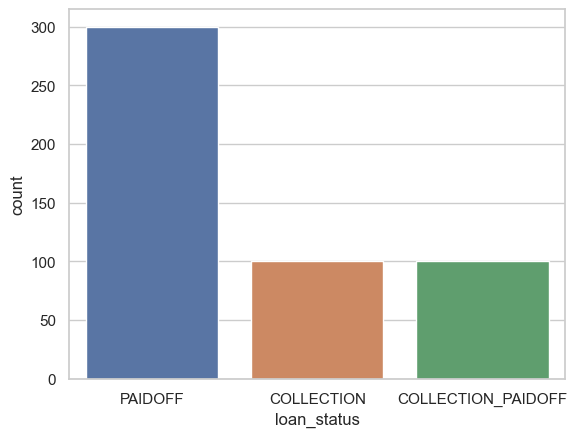

In [111]:
#Setting seaborn background to be just white
sns.set(style="whitegrid")

#Checking the number of observations per loan status: Paid Off, Collection or Collection_PaidOff status
x = sns.countplot(x="loan_status", data=df_loan)

**Comments:** <br/>
From this we can see that most of the loans have been **paid off without any collection efforts (blue)**, while there are equal number of loans which are **still being collected (orange)** and loans which have been **paid off after collection efforts (green)** 

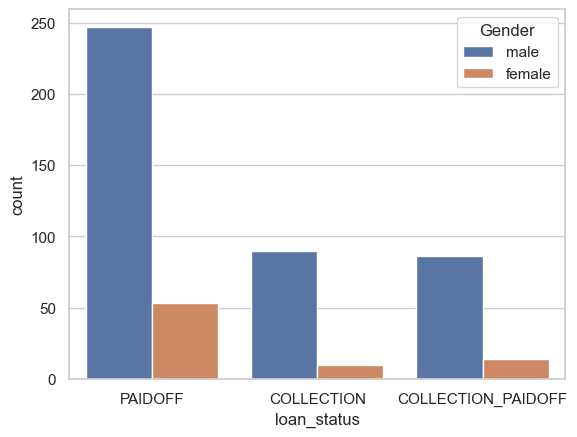

In [75]:
#Checking loan status based on gender, i.e. double bar chart wherein the color indicates gender
y = sns.countplot(x="loan_status", data=df_loan , hue='Gender')

**Comments:** <br/>
Chart shows that there are fewer number of observations for female borrowers in the sample compared to male.

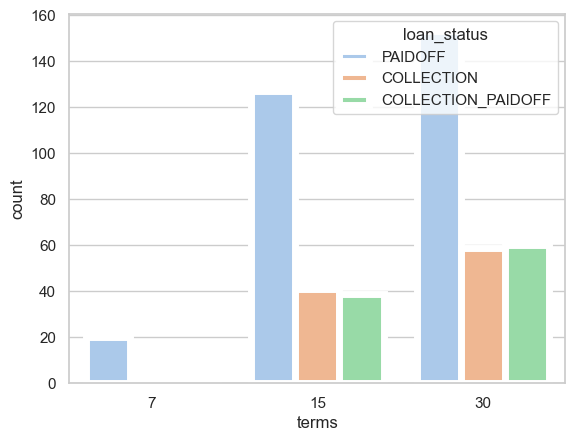

In [89]:
#Checking the loan totals for each schedule: Weekly (7 days), Bi-weekly (15 Days) , Monthly (30days) payments and their loan status.
x = sns.countplot(x="terms", data=df_loan , hue='loan_status', palette='pastel', linewidth=5)

**Comments:** <br/>
There are few borrowers who have set their schedule to pay weekly but all of them have already been paid off. While there are also some who have their schedule set to biweekly and monthly modes. Analyzing visually, borrowers who aren't paid yet seems to have set their schedule to monthly, but it was not greatly different to the borrowers who have set their schedules to bi-weekly. 

In [98]:
df_loan[df_loan.loan_status.notnull()]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


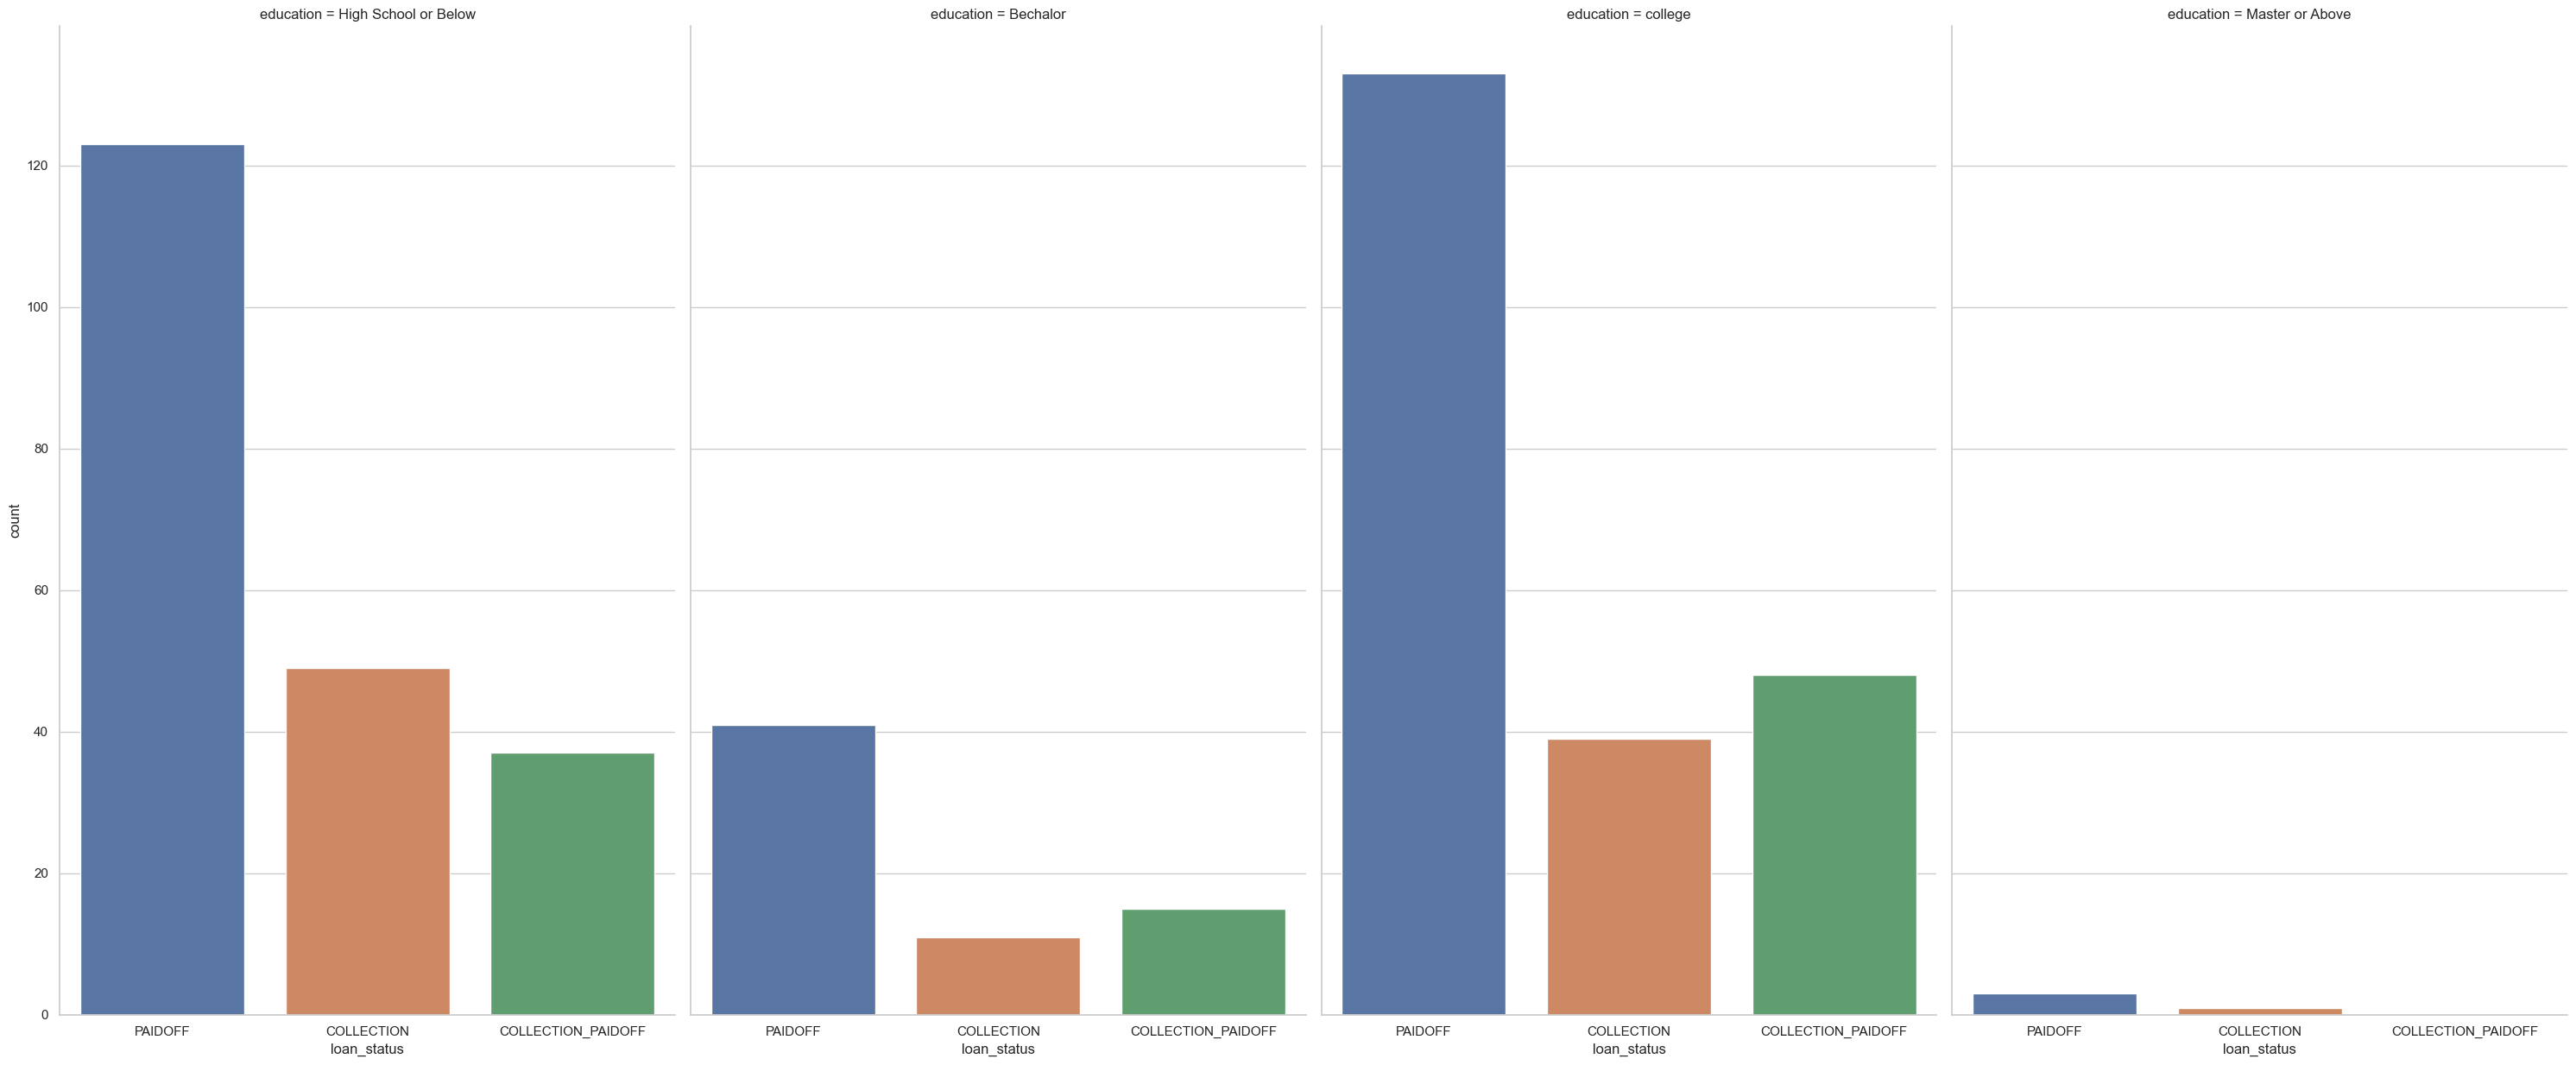

In [99]:
#Checking if level of education affects loan amount and payment status.

educ = sns.catplot(data=df_loan[df_loan.loan_status.notnull()],
                   x="loan_status", col="education", col_wrap=4,
                 kind="count", height=12.5, aspect=.6)

**Comments:** <br/>
In the above visualization we have each level of education per column cell. And each cell is classified further into the loan status of the borrower. From the data, High School and College grads paid back well in time so they are *better candidates for loans by banks.

There are fewer applications for Bachelors degree students and most of them paid it off by themselves (i.e. without collection efforts from the institution) while some paid off after collection efforts (green).

Lastly, there are very few Post-grad degree holder borrowers from the dataset and mostly have paid it without intervention while there is very which are still not paid off.

*Based on the dataset

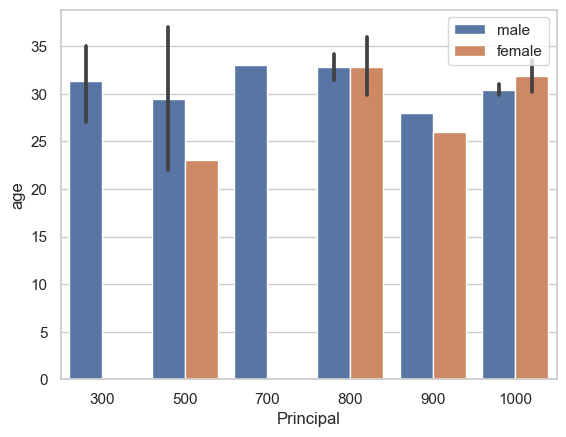

In [105]:
#Checking if there is relationship between the amount of loan (Principal) and the gender and age of the borrower

ax = sns.barplot(x="Principal", y="age",hue="Gender" ,  data=df_loan)
ax.legend(loc="upper right")

**Comment:** <br/>
The visualization shows that for principal amount borrowed by male and female borrowers

**Note:** <br/>

Black bar indicates the the error bar. This represents the variability of data and used on graphs to indicate the error or uncertainty in a reported measurement, i.e. error tolerance.

<Figure size 2500x500 with 0 Axes>

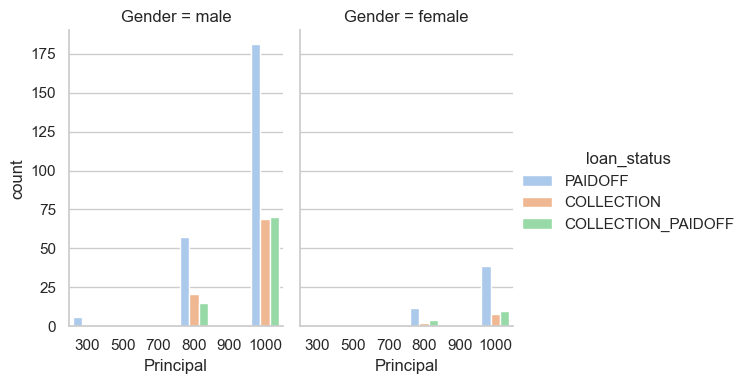

In [107]:
#Checking if there is relationship between the loan status and gender

fig = plt.figure(figsize=(25,5))
g = sns.catplot(x="Principal", hue="loan_status", col="Gender",palette='pastel',
                data=df_loan, kind="count",
                 height=4, aspect=.7);

**Comment:** <br/>
From the visualization we can clearly see that there is much more male borrowers compared to female borrowers.

**Pairplot:** <br/>

Now we'll do a pairplot with the color distinguishing the gender, what it does is similar to a correlation table.

Pairplot looks busy at first glance as there are a lot of things going on, but it is useful when we are trying to understand the best set of features to explain a relationship between two variables or to form the most separated clusters (for our training later).

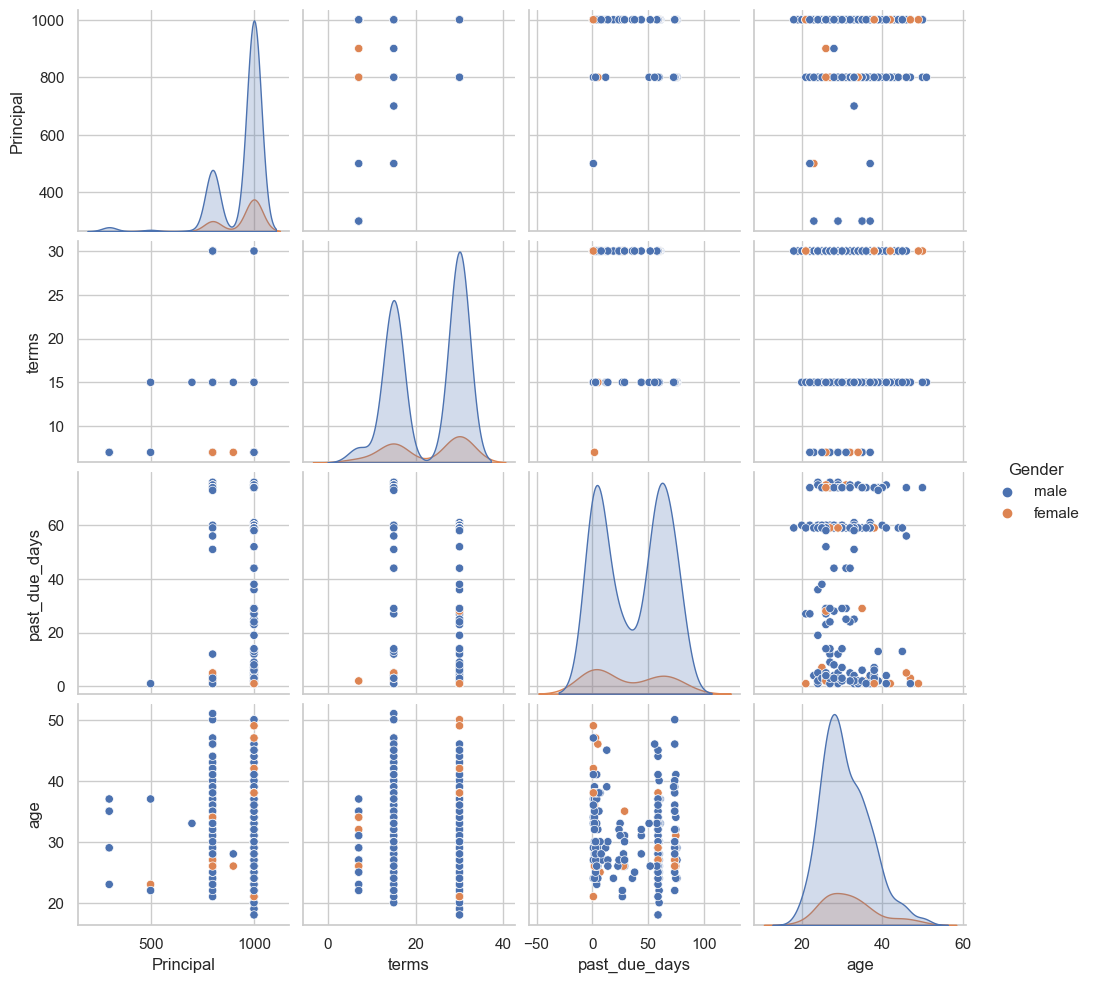

In [109]:
sns.pairplot(df_loan, hue='Gender')

**Comments:**
- From the visualization we can observe the variations in each plot.
- The plots are in matrix format where the row name represents x axis and column name represents the y axis.
- The main-diagonal subplots are the univariate (age vs age, principal vs principal, etc) histograms for each attribute.

### Data Preprocessing and Modeling

In this part we will clean our data, and transform our non-numerical data to numerical with either binary encoding or ordinal encoding. We will define functions to the encoding and then pass our data later on to these functions. Later we will visualize our fully encoded data, ready for training and testing.

**Binary Encoder** <br/>
- What this function does is assign binary values (0 or 1) to our data (e.g. 1 - Male, 0 - Female).
- It takes 3 arguments or inputs:
1. df (data)
2. column (column of the data that we want to encode)
3. positive_value (which value do we want to take the positive assignment)

- It returns the encoded value of the data

It also uses the **Apply-Lambda technique** which is a function in Pandas that we use if we want to re-assign a new value to a data if it meets a certain criteria or condition.

In this case, it will change the value of a data to 1 if the data satisfies the argument that we provided for positive_value

In [110]:
#Defining the binary encoder function

def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df



**Ordinal Encoder** <br/>
- What this function does is assign a numerical or ordinal values (1, 2, 3, 4 ...) to our data (e.g. 1 - High School, 2 - Bachelors, etc).
- It takes 3 arguments or inputs:
1. df (Pandas dataframe data)
2. column (name of column from the data that we want to encode)
3. ordering (takes an array input of the unique values in order of how we want them to have the numbers assigned)

- It returns the encoded value of the data

It also uses the **Apply-Lambda technique** which was explained above.

In [112]:
# Defining the ordinal encoder

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

**Preprocessing**

This  preprocess_inputs function takes a Pandas DataFrame as an argument and preprocesses it for use in a machine learning model. The function performs the following steps:

Data Cleaning
1. It creates a copy of the input DataFrame to avoid modifying the original data.
2. Drops the Loan_ID column from the DataFrame because it is irrelevant to our model.
3. Converts the effective_date, due_date, and paid_off_time columns to a unified datetime format.
4. Extracts the day, month, and hour values from the effective_date, due_date, and paid_off_time columns and creates new columns for each.
5. Drops the effective_date, due_date, and paid_off_time columns from the DataFrame as we already got what we want from them in step 4.
6. Fills missing values in the past_due_days, paid_off_month, paid_off_day, and paid_off_hour columns with their respective column **means**.

Encoding
1. Encodes the Gender column with binary encoding, where 'male' is represented as 1 and 'female' is represented as 0. <br/>
2. Encodes the education column with ordinal encoding, based on the provided education_ordering. <br/>
3. Encodes the loan_status column with numerical labels, based on the provided label_mapping.

Data Splitting
1. Splits the preprocessed DataFrame into input features X and target variable y. 

Normalizing
1. Scales the input features using the StandardScaler method from Scikit-learn. 

Output
1. Finally, the function returns the preprocessed input features X and target variable y.

In [113]:
def preprocess_inputs(df):
    df = df.copy()
    
    ###################
    ## DATA CLEANING ##
    ###################

    # Drop Loan_ID column
    df = df.drop('Loan_ID', axis=1)
    
    # Create date/time columns
    for column in ['effective_date', 'due_date', 'paid_off_time']:
        df[column] = pd.to_datetime(df[column])
    
    df['effective_day'] = df['effective_date'].apply(lambda x: x.day)
    
    df['due_month'] = df['due_date'].apply(lambda x: x.month)
    df['due_day'] = df['due_date'].apply(lambda x: x.day)
    
    df['paid_off_month'] = df['paid_off_time'].apply(lambda x: x.month)
    df['paid_off_day'] = df['paid_off_time'].apply(lambda x: x.day)
    df['paid_off_hour'] = df['paid_off_time'].apply(lambda x: x.hour)
    
    df = df.drop(['effective_date', 'due_date', 'paid_off_time'], axis=1)
    
    # Fill missing values with column means
    for column in ['past_due_days', 'paid_off_month', 'paid_off_day', 'paid_off_hour']:
        df[column] = df[column].fillna(df[column].mean())

    ################
    ### ENCODING ###
    ################
    
    # Binary encode the Gender column
    df = binary_encode(df, 'Gender', positive_value='male')
    
    # Ordinal encode the education column
    education_ordering = [
        'High School or Below',
        'college',
        'Bechalor',
        'Master or Above'
    ]
    df = ordinal_encode(df, 'education', ordering=education_ordering)
    
    # Encode the label (loan_status) column
    label_mapping = {'COLLECTION': 0, 'PAIDOFF': 1, 'COLLECTION_PAIDOFF': 2}
    df['loan_status'] = df['loan_status'].replace(label_mapping)

    # Split df into X and y
    y = df['loan_status'].copy()
    X = df.drop('loan_status', axis=1).copy()

    #################
    ## NORMALIZING ##
    #################
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    ##############
    ### OUTPUT ###
    ##############

    return X, y

In [114]:
# Applying the preprocess function into our data

X, y = preprocess_inputs(df_loan)

In [115]:
# Checking out features/inputs:
X

,Principal,terms,past_due_days,age,education,Gender,effective_day,due_month,due_day,paid_off_month,paid_off_day,paid_off_hour
0,0.493377,0.897891,0.000000,2.284043,-1.022825,0.426653,-3.126073,0.664986,-1.303142,-1.035098,-0.463997,1.339835
1,0.493377,0.897891,0.000000,3.106587,1.771779,-2.343823,-3.126073,0.664986,-1.303142,0.690066,-1.475829,-1.072109
2,0.493377,0.897891,0.000000,0.309935,1.771779,-2.343823,-3.126073,0.664986,-1.303142,-1.035098,1.126025,0.616252
3,0.493377,-0.978972,0.000000,-0.677119,0.374477,0.426653,-3.126073,-1.094236,0.724148,-1.035098,0.692382,1.581030
4,0.493377,0.897891,0.000000,-0.512610,0.374477,-2.343823,-2.209336,0.664986,-1.167989,-1.035098,0.836930,1.822224
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.493377,0.897891,-1.780899,-0.512610,-1.022825,0.426653,0.540875,0.664986,-0.762531,0.690066,-0.463997,1.339835
496,0.493377,-0.978972,-1.187446,-0.841628,-1.022825,0.426653,0.540875,-1.094236,1.264758,0.690066,-1.042187,1.581030
497,-1.243866,-0.978972,-1.780899,-0.183592,0.374477,0.426653,0.540875,-1.094236,1.264758,-1.035098,1.704214,-0.589721
498,0.493377,0.897891,-1.888799,1.132480,0.374477,-2.343823,0.540875,2.424209,-0.897684,2.415229,-0.897640,2.063419


In [117]:
#Checking the target (0 - COLLECTION, 1 - PAID OFF, 2 - COLLECTION PAID OFF)
y

0      1
1      1
2      1
3      1
4      1
      ..
495    2
496    2
497    2
498    2
499    2
Name: loan_status, Length: 500, dtype: int64

In [118]:
# Randomly splitting test and train datasets using sklearn's train_test_split function,
# We split it to 70% training data, 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

**Model Training**

In the next cell we define a list models containing different machine learning models and we'll fit the training data to each of these models. WHat the code does is:

1. Defines a list models that contains six different machine learning models:

* LogisticRegression: A linear classification model that uses logistic regression to predict the target variable.
* SVC: A support vector machine model that can be used for classification or regression tasks.
* DecisionTreeClassifier: A tree-based model that makes decisions based on a set of rules derived from the training data.
* MLPClassifier: A neural network model that can be used for classification tasks.
* RandomForestClassifier: An ensemble model that combines multiple decision trees to improve accuracy and reduce overfitting.
* XGBClassifier: A gradient boosting model that uses decision trees as weak learners and optimizes the model using gradient descent.

2. Loops over each model in the models list.

3. Fits the current model to the training data using the fit method. The input features X_train and target variable y_train are passed as arguments to the fit method. This trains the model on the training data, so that it can later be used to make predictions on new data.

In the next cell we will train multiple machine learning models on the same training data, so we can compare their performance on the dataset.

In [119]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

for model in models:
    model.fit(X_train, y_train)

c:\Users\flore\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Evaluation**

We now evaluate the performance of each model in the models list on a test dataset X_test and y_test. What the code does is:

1. Defines a list model_names that contains names of the machine learning models in models. These names are used to identify the model when printing its accuracy score.
2. Loops over each model in models and its corresponding name in model_names using the zip function.
3. For each model, the score method is called with the test data as input (X_test and y_test). This method returns the accuracy of the model on the test data as a float between 0 and 1.
4. The accuracy score is multiplied by 100 to convert it to a percentage.
5. The name of the model and its accuracy score are printed to the console using the print function. The accuracy score is formatted to have four decimal places and is included in a string along with the model name.

The accuracy score represents the percentage of test examples that the model correctly classified.

In [120]:
model_names = [
    "   Logistic Regression",
    "Support Vector Machine",
    "         Decision Tree",
    "        Neural Network",
    "         Random Forest",
    "               XGBoost"
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(X_test, y_test) * 100))

   Logistic Regression: 98.6667%
Support Vector Machine: 98.6667%
         Decision Tree: 100.0000%
        Neural Network: 100.0000%
         Random Forest: 100.0000%
               XGBoost: 100.0000%


The score() method used in this code is specific to the scikit-learn library's machine learning models. By default, this method computes the accuracy of the model, which is the proportion of correctly classified examples out of the total number of examples in the test dataset. Therefore, the accuracy score reported by this code is the proportion of correctly classified examples for each model, expressed as a percentage.

**Recommendation**

The training would be more efficient if we would be selective of the inputs to include in training, ie including only the features or columns that have a high correlation to the output.